<a href="https://colab.research.google.com/github/Neha2805/Heart_Disease_Prediction/blob/main/Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df = pd.read_csv('/content/heart_cleveland_upload.csv')

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [74]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [76]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

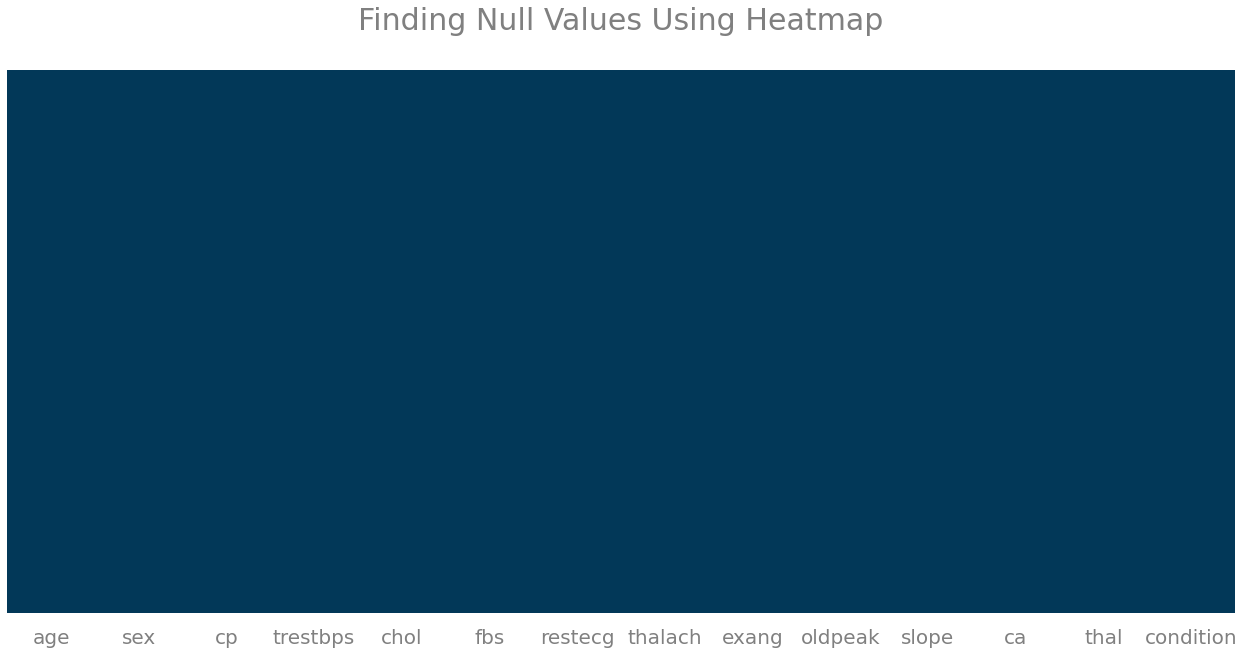

In [77]:
# visualizing null values if it exists
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [78]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  187.053104
12      thal   87.903888
11        ca   82.730613
9    oldpeak   68.570533
8      exang   35.508090
0        age   22.917697
2         cp   21.352432
4       chol   20.855084
10     slope   20.818579
3   trestbps   16.707463
6    restecg    8.134652
1        sex    7.444195


[0.073915   0.04579976 0.11382621 0.06173505 0.06336774 0.02000823
 0.03344102 0.0774831  0.08695467 0.07802141 0.05992485 0.12834245
 0.15718051]


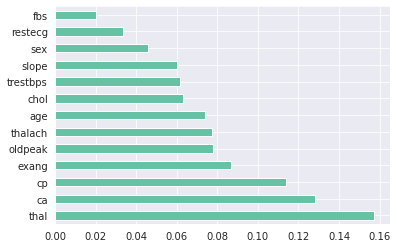

In [79]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

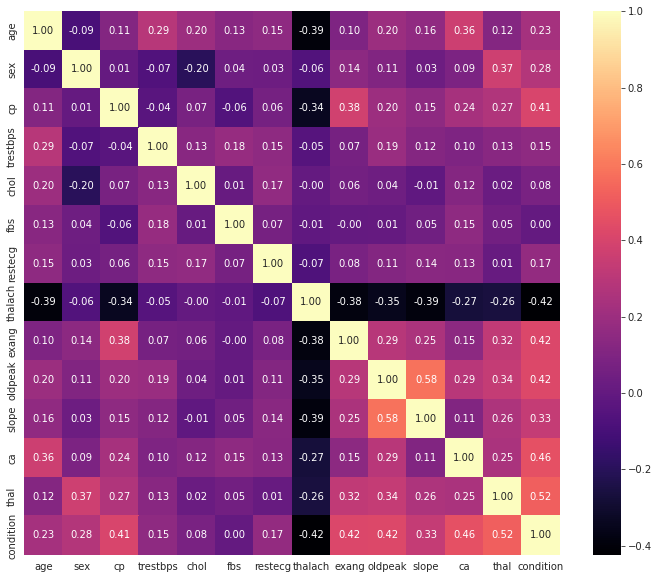

In [80]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [81]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 50
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 4
thal 3
condition 2


In [82]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [83]:
df2 = df.copy()

In [84]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)

In [85]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['condition'] = df2['condition'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

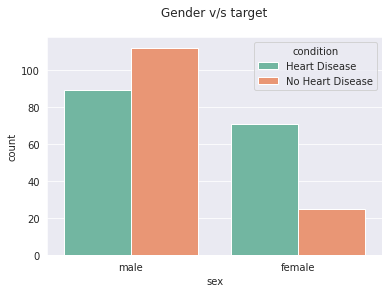

In [86]:
sns.countplot(data= df2, x='sex',hue='condition')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

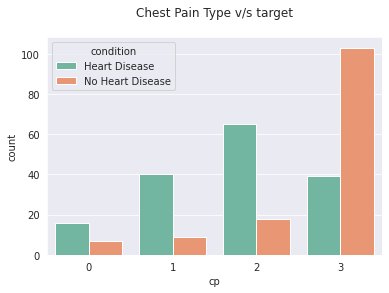

In [87]:
sns.countplot(data= df2, x='cp',hue='condition')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


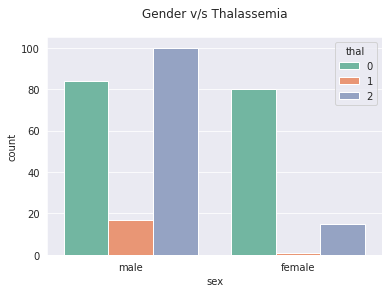

In [88]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

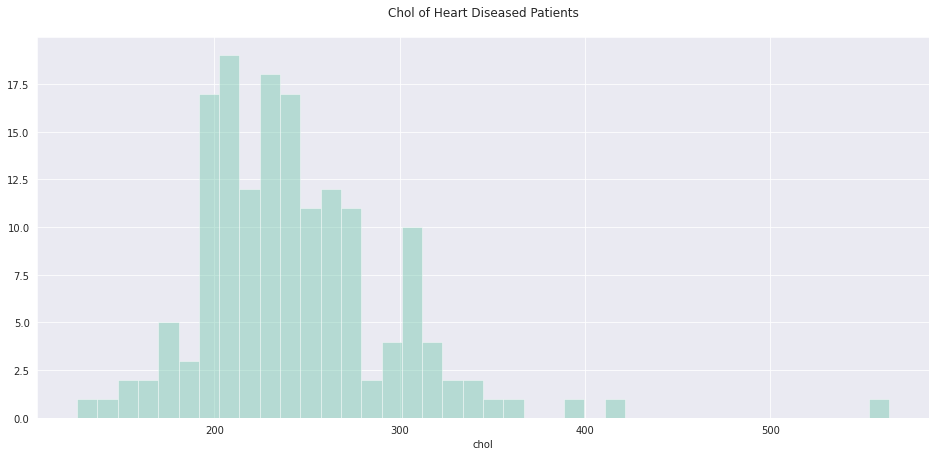

In [89]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['condition']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

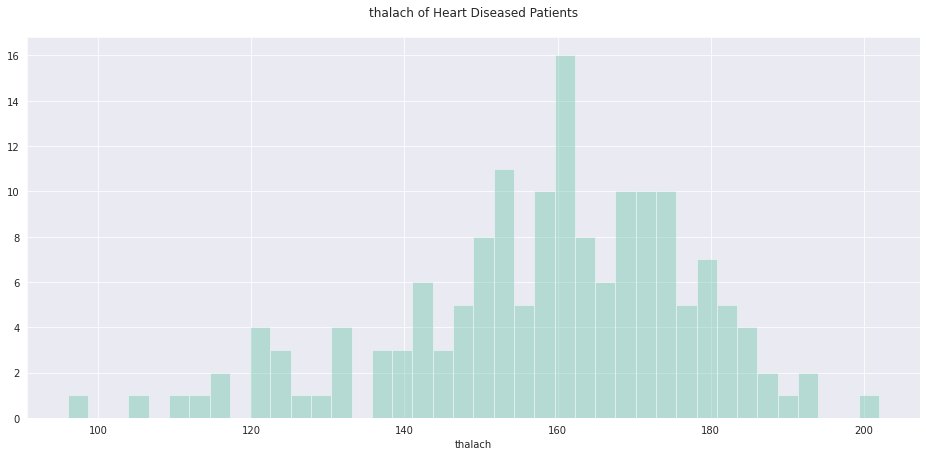

In [90]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['condition']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

In [93]:
df3 = df[df['condition'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


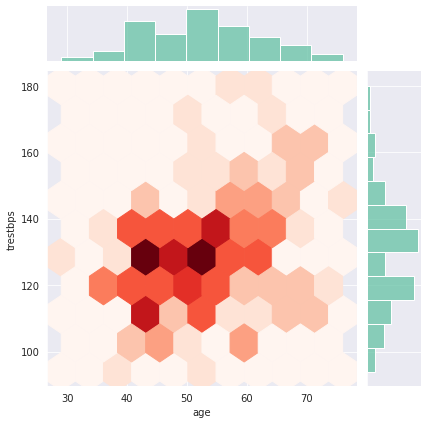

In [94]:
pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )


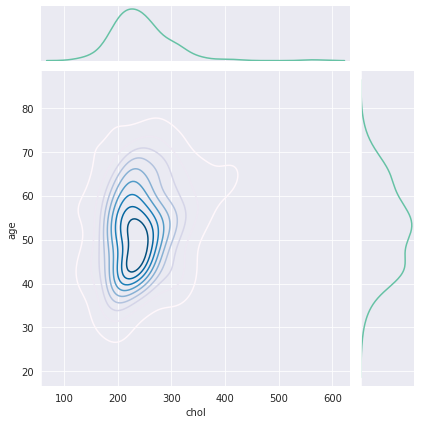

In [95]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


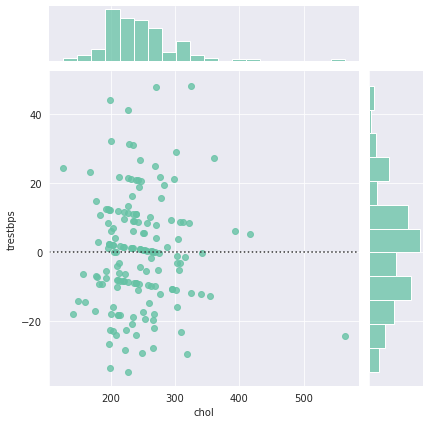

In [96]:
sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )


In [97]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [98]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [99]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [100]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


In [102]:

feature_cols = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']

In [103]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667


In [130]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'condition']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'condition'],
      dtype='object')

In [132]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [133]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,condition
0,69,1,asymptomatic,160,234,1,ST-T wave abnormality,131,0,0.1,flat,1,nothing,0
1,69,0,asymptomatic,140,239,0,left ventricular hypertrophy,151,0,1.8,downsloping,2,nothing,0
2,66,0,asymptomatic,150,226,0,left ventricular hypertrophy,114,0,2.6,upsloping,0,nothing,0
3,65,1,asymptomatic,138,282,1,ST-T wave abnormality,174,0,1.4,flat,1,nothing,1
4,64,1,asymptomatic,110,211,0,ST-T wave abnormality,144,1,1.8,flat,0,nothing,0


In [134]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'condition', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing'],
      dtype='object')

In [135]:
df_temp = data['thalassemia_type_fixed defect']

In [136]:
data = pd.get_dummies(df, drop_first=True)

In [137]:
data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,condition,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing
0,69,1,160,234,1,131,0,0.1,1,0,0,0,0,0,0,1,0,0,1
1,69,0,140,239,0,151,0,1.8,2,0,0,0,0,1,0,0,0,0,1
2,66,0,150,226,0,114,0,2.6,0,0,0,0,0,1,0,0,1,0,1
3,65,1,138,282,1,174,0,1.4,1,1,0,0,0,0,0,1,0,0,1
4,64,1,110,211,0,144,1,1.8,0,0,0,0,0,0,0,1,0,0,1


In [138]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,condition,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_fixed defect
0,69,1,160,234,1,131,0,0.1,1,0,0,0,0,0,0,1,0,0,1,0
1,69,0,140,239,0,151,0,1.8,2,0,0,0,0,1,0,0,0,0,1,0
2,66,0,150,226,0,114,0,2.6,0,0,0,0,0,1,0,0,1,0,1,0
3,65,1,138,282,1,174,0,1.4,1,1,0,0,0,0,0,1,0,0,1,0
4,64,1,110,211,0,144,1,1.8,0,0,0,0,0,0,0,1,0,0,1,0


In [139]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'condition', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [154]:
X = result.drop('condition', axis = 1)

In [155]:
y = result['condition']

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
logre = LogisticRegression()

In [161]:
logre.fit(X_train,y_train)

LogisticRegression()

In [149]:
y_pred = logre.predict(X_test)

ValueError: ignored

In [122]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [123]:
result  = pd.DataFrame(dic)

In [124]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

ValueError: ignored

In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

ValueError: ignored

In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

ValueError: ignored